In [1]:
main_folder = r"D:\Data Science\Coconut Tree Disease Data"
train_folder = r"D:\Data Science\Coconut Tree Disease Data\train"
test_folder = r"D:\Data Science\Coconut Tree Disease Data\test"

In [2]:
import os
os.mkdir(main_folder)
os.mkdir(train_folder)
os.mkdir(test_folder)

In [4]:
import os
import shutil
import random

def split_data(source, destination, split_ratio=(0.8, 0.1, 0.1)):
    # Create train, validation, and test directories
    for subset in ['train', 'validation', 'test']:
        os.makedirs(os.path.join(destination, subset), exist_ok=True)
    
    # Iterate through each class directory
    for class_name in os.listdir(source):
        class_directory = os.path.join(source, class_name)
        if os.path.isdir(class_directory):
            # Get list of image files
            image_files = os.listdir(class_directory)
            # Shuffle the list of image files
            random.shuffle(image_files)
            
            # Calculate split sizes
            num_images = len(image_files)
            train_split = int(split_ratio[0] * num_images)
            val_split = int(split_ratio[1] * num_images)
            
            # Split the images
            train_images = image_files[:train_split]
            val_images = image_files[train_split:train_split+val_split]
            test_images = image_files[train_split+val_split:]
            
            # Move or copy images to their respective directories
            for subset, images in zip(['train', 'validation', 'test'], [train_images, val_images, test_images]):
                subset_directory = os.path.join(destination, subset, class_name)
                os.makedirs(subset_directory, exist_ok=True)
                for image in images:
                    source_path = os.path.join(class_directory, image)
                    destination_path = os.path.join(subset_directory, image)
                    shutil.copy(source_path, destination_path)  # Use shutil.move if you want to move rather than copy
                    
# Source directory containing class directories with images
source_directory = "D:\Data Science\Coconut Tree Disease Dataset"
# Destination directory where train, validation, and test sets will be created
destination_directory = "D:\Data Science\Coconut Tree Disease Data"

# Split data into train, validation, and test sets
split_data(source_directory, destination_directory)


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import time

#tf.config.set_visible_devices(pd[0], 'GPU')

In [2]:
pd = print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


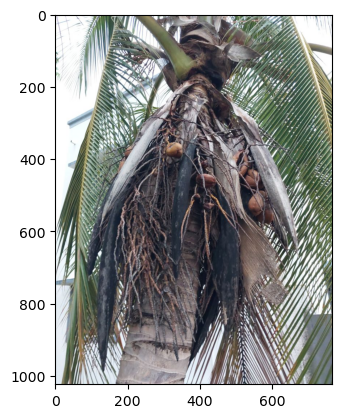

Input shape: (1024, 768, 3)


In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Open the image using PIL (Python Imaging Library)
with Image.open(r"D:\Data Science\Coconut Tree Disease Dataset\Bud Root Dropping\BudRootDropping001.jpg") as img:
    # Get the width and height of the image
    img_array = np.array(img)
    # Plot the image
    plt.imshow(img_array)
    plt.show()
    
    width, height = img.size
    # Get the number of channels (1 for grayscale, 3 for RGB)
    channels = len(img.getbands())

# Determine the input shape
input_shape = (height, width, channels)

print("Input shape:", input_shape)


i = 0
for batch in train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size = (100, 100),
                                                    class_mode = 'categorical',
                                                    batch_size = 50,
                                                    color_mode = "rgb",
                                                    save_to_dir= r"D:\Data Science\Coconut Tree Disease Data\augmented",
                                                    save_format="jpg"
                                                  ):
    i += 1
    if i>41 :
        break;

### augmentation
#### Define augmentation parameters
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Rescale pixel values to [0, 1]
    rotation_range=20,  # Rotate images randomly within the range [-20, 20] degrees
    width_shift_range=0.2,  # Shift images horizontally by up to 20% of the image width
    height_shift_range=0.2,  # Shift images vertically by up to 20% of the image height
    shear_range=0.2,  # Apply shear transformation with a shear intensity of up to 20%
    zoom_range=0.2,  # Zoom in or out by up to 20%
    horizontal_flip=True,  # Flip images horizontally (left to right) randomly
    fill_mode='nearest'  # Strategy for filling in newly created pixels
)

In [131]:
train_dir = r"D:\Data Science\Coconut Tree Disease Data\train"
test_dir = r"D:\Data Science\Coconut Tree Disease Data\test"
validation_dir = r"D:\Data Science\Coconut Tree Disease Data\validation"


train_generator = train_datagen.flow_from_directory(
                                    train_dir,
                                    target_size = (256, 256),
                                    class_mode = 'categorical',
                                    batch_size = 50
                                )


test_datagen = ImageDataGenerator(rescale = 1.0/255)
test_generator = test_datagen.flow_from_directory(
                                                    test_dir,
                                                    target_size = (256, 256),
                                                    class_mode = 'categorical',
                                                    batch_size = 50,
                                                    shuffle=False
                                                  )

validation_datagen = ImageDataGenerator(rescale = 1.0/255)
validation_generator = validation_datagen.flow_from_directory(
                                                    validation_dir,
                                                    target_size = (256, 256),
                                                    class_mode = 'categorical',
                                                    batch_size = 50,
                                                    shuffle=False
                                                  )

Found 4637 images belonging to 5 classes.
Found 583 images belonging to 5 classes.
Found 578 images belonging to 5 classes.


In [108]:
train_generator.image_shape

(256, 256, 3)

In [109]:
model = tf.keras.models.Sequential([
      Conv2D(16, (5,5), activation='relu', input_shape = train_generator.image_shape),
      MaxPooling2D(2, 2),
      Conv2D(32, (5,5), activation='relu'),
      MaxPooling2D(5, 5),
      Conv2D(64, (5,5), activation='relu'),
      MaxPooling2D(2, 2),
      Flatten(),
      Dense(512, activation='relu'),
      Dropout(0.2),
      Dense(1024, activation='relu'),
      Dropout(0.2),
      Dense(5, activation='softmax')
])
model.compile(optimizer = "adam", loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_300 (Conv2D)         (None, 252, 252, 16)      1216      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 126, 126, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_301 (Conv2D)         (None, 122, 122, 32)      12832     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_302 (Conv2D)         (None, 20, 20, 64)        51264     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 10, 10, 64)      

In [110]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_acc', patience = 2, min_delta=0.01)

In [111]:
st = time.time()
model.fit_generator(train_generator,
                    epochs = 25,
                    verbose = 1,
                    validation_data = validation_generator,
                    callbacks = [es]
                    )
end = time.time()
print(end-st)

C:\Users\Saurabh\AppData\Local\Temp\ipykernel_19768\1527936488.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,


Epoch 1/25
93/93 [==============================] - 112s 1s/step - loss: 1.1458 - acc: 0.5001 - val_loss: 0.8089 - val_acc: 0.6869
Epoch 2/25
93/93 [==============================] - 111s 1s/step - loss: 0.7084 - acc: 0.7086 - val_loss: 0.4970 - val_acc: 0.8183
Epoch 3/25
93/93 [==============================] - 118s 1s/step - loss: 0.5232 - acc: 0.7925 - val_loss: 0.3852 - val_acc: 0.8270
Epoch 4/25
93/93 [==============================] - 119s 1s/step - loss: 0.4345 - acc: 0.8279 - val_loss: 0.2155 - val_acc: 0.9360
Epoch 5/25
93/93 [==============================] - 114s 1s/step - loss: 0.4084 - acc: 0.8445 - val_loss: 0.3177 - val_acc: 0.9014
Epoch 6/25
93/93 [==============================] - 122s 1s/step - loss: 0.3274 - acc: 0.8784 - val_loss: 0.1794 - val_acc: 0.9360
697.5589537620544


In [112]:
model.evaluate(test_generator)

12/12 [==============================] - 7s 527ms/step - loss: 0.2039 - acc: 0.9348


[0.2039271891117096, 0.9348198771476746]

In [113]:
y_pred = model.predict(test_generator)
y_true = test_generator.classes

12/12 [==============================] - 7s 534ms/step


In [114]:
y_pred.shape , y_true.shape

((583, 5), (583,))

In [115]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Convert probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Print classification report
print(classification_report(y_true, y_pred_labels))


              precision    recall  f1-score   support

           0       0.81      0.98      0.89        52
           1       1.00      0.81      0.89        47
           2       0.93      0.96      0.94       214
           3       0.94      0.89      0.91       168
           4       0.99      1.00      1.00       102

    accuracy                           0.93       583
   macro avg       0.93      0.93      0.93       583
weighted avg       0.94      0.93      0.93       583



In [117]:
print(confusion_matrix(y_true, y_pred_labels))

[[ 51   0   1   0   0]
 [  1  38   6   2   0]
 [  0   0 205   8   1]
 [ 11   0   8 149   0]
 [  0   0   0   0 102]]


In [ ]:
# Save the custom CNN model
model.save('custom_coconut_disease_model.h5')

## InceptionV3

In [118]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model

In [138]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

In [139]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

In [140]:
# Add your custom classification layers on top of the pre-trained layers
l = base_model.output
l = Flatten()(l)
l = Dense(512, activation='relu')(l)
l = Dropout(0.2)(l)
l = Dense(1024, activation='relu')(l)
l = Dropout(0.2)(l)
predictions = Dense(5, activation='softmax')(l) 

In [143]:
# Combine the base model with your custom layers
model1 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model1.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_491 (Conv2D)            (None, 127, 127, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_470 (Batch  (None, 127, 127, 32  96         ['conv2d_491[0][0]']             
 Normalization)                 )                                                           

In [144]:
es1 = EarlyStopping(monitor='val_accuracy', patience = 2, min_delta=0.01)

In [145]:
# Train the model
start_time = time.time()
history = model1.fit_generator(
                    train_generator,
                    epochs = 25,
                    verbose = 1,
                    validation_data = validation_generator,
                    callbacks = [es1]
                    )
end_time = time.time()
print("Training time:", end_time - start_time)

C:\Users\Saurabh\AppData\Local\Temp\ipykernel_19768\3478494129.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model1.fit_generator(


Epoch 1/25
93/93 [==============================] - 139s 1s/step - loss: 0.2495 - accuracy: 0.9288 - val_loss: 0.1142 - val_accuracy: 0.9810
Epoch 2/25
93/93 [==============================] - 125s 1s/step - loss: 0.2017 - accuracy: 0.9375 - val_loss: 0.0570 - val_accuracy: 0.9827
Epoch 3/25
93/93 [==============================] - 123s 1s/step - loss: 0.2614 - accuracy: 0.9122 - val_loss: 0.1038 - val_accuracy: 0.9723
Training time: 388.1941523551941


In [146]:
# Evaluate the model
y_pred = model1.predict(test_generator)
y_true = test_generator.classes

# Convert probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Print classification report and confusion matrix
print(classification_report(y_true, y_pred_labels))

12/12 [==============================] - 16s 1s/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        47
           2       0.97      0.96      0.96       214
           3       0.95      0.96      0.96       168
           4       1.00      1.00      1.00       102

    accuracy                           0.97       583
   macro avg       0.98      0.98      0.98       583
weighted avg       0.97      0.97      0.97       583



In [147]:
print(confusion_matrix(y_true, y_pred_labels))

[[ 52   0   0   0   0]
 [  0  47   0   0   0]
 [  0   0 206   8   0]
 [  0   0   7 161   0]
 [  0   0   0   0 102]]


In [ ]:
# Save the InceptionV3 model
model1.save('inceptionV3_coconut_disease_model.h5')